# Lab \#1

#### Kevin J. Wang

In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

### "Sigma" Significance and the Gaussian Distribution

In physics, the "sigma" value of an experimental result is used to communicate the probability that the result is a false positive due to random chance. According to Professor Morales, a significance of X sigma means the probability of random noise "giving me a data point that looks as or more signal-like than the reading I have is the same probability as if my data was Gaussian and I was X sigma away from the mean."

What does it mean for Professor Morales's data to be "Gaussian"? It means the measurement has a Gaussian/normal/"bell curve" probability distribution function. Below is a histogram of this type of distribution from HW1:

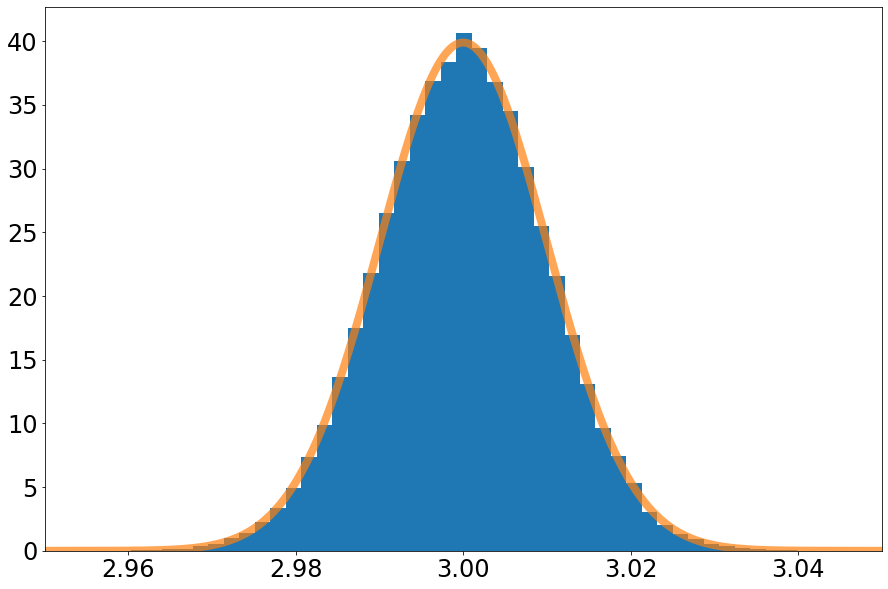

In [48]:
plt.rcParams["figure.figsize"] = (15,10)
d = stats.norm.rvs(loc = 3.0, scale = .01, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([2.95,3.05])
x = np.linspace(2.95,3.05,1000)
ax.plot(x,stats.norm.pdf(x,loc = 3., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

An interesting fact about the Gaussian distribution is that it resembles a parabola when plotted on a "semi-log" plot, where the y-axis has a logarithmic scale (also from HW1):

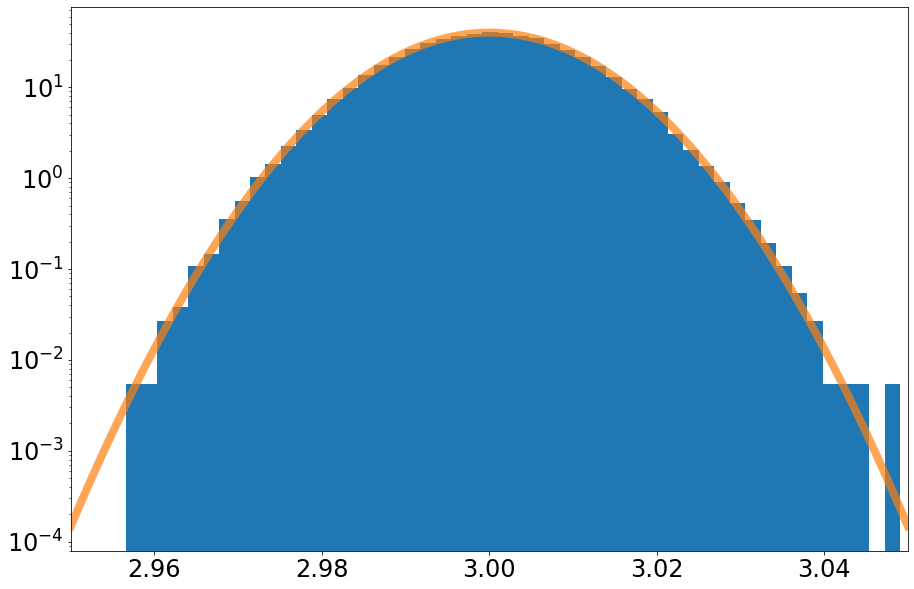

In [49]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([2.95,3.05])
x = np.linspace(2.95,3.05,1000)
ax.plot(x,stats.norm.pdf(x,loc = 3., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

To find the probability of a measurement on a standard normal distribution (mean=0, standard deviation=1), one should integrate the function and use bounds appropriate for the physics problem. The function stats.norm.cdf() in scipy calculates this integral from negative infinity to the sigma value(s) passed in.

In [50]:
stats.norm.cdf([-3, -1, 0, 0.1, 2])

array([0.0013499 , 0.15865525, 0.5       , 0.53982784, 0.97724987])

Physicists also often do the inverse of this operation, where they calculated the probability, and now want the sigma value. The function stats.norm.ppf() does this, but if the probability is less than 50%, the result will be negative because it is integrating from negative infinity instead of positive infinity.

In [51]:
stats.norm.ppf([0.00135, 0.158655, 0.5, 0.5398, 0.97725])

array([-2.99997699, -1.00000105,  0.        ,  0.09992987,  2.00000244])

### Exponential Distribution
Not all experimental data form Gaussian probability distributions. Another one that can occur is the exponential distribution. According to Wikipedia, the exponential distribution is a particular case of the gamma distribution, and the continuous version of the Poisson discrete distribution. Instead of the normal distribution's infinitely-wide bell-shaped curve, the exponential distribution only covers the positive numbers and looks like a line descending exponentially toward 0.

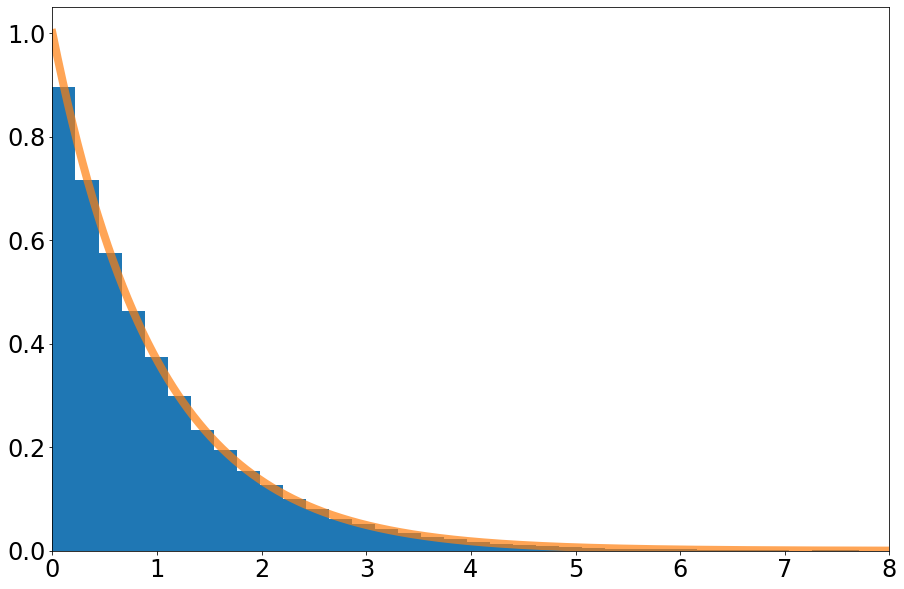

In [52]:
dE = stats.expon.rvs(scale = 1, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(dE,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,8])
x = np.linspace(0,8,1000)
ax.plot(x,stats.expon.pdf(x, scale = 1),linewidth = 8,alpha = 0.7)
plt.show()

When the y-axis has a logarithmic scale, the exponential distribution looks like a straight line.

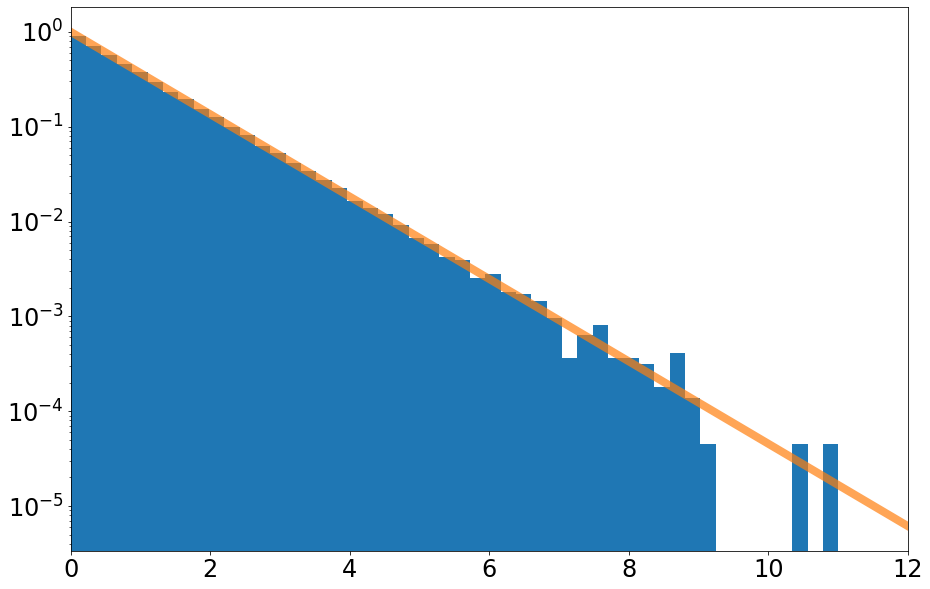

In [53]:
fig, ax = plt.subplots(1, 1)
ax.hist(dE,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([0,12])
x = np.linspace(0,12,1000)
ax.plot(x,stats.expon.pdf(x, scale = 1),linewidth = 8,alpha = 0.7)
plt.show()

Now that we know what an exponential function looks like, how do we find the sigma value of a measurement? Since the background noise is no longer gaussian, there is an extra step. First we do an integral (probably to +infinity for this distribution) to find the probability, then compare that probability to a Gaussian probability density function to see what sigma away from the mean in a Gaussian function produces the same probability.

Let's take the example of a measured value of 6.9 where we want to learn whether the true value is larger than the mean of the above distribution. If we know that the measuring device or background noise puts measurements on an exponential distribution that is >= 0 and has "scale" 1, we calculate the integral of the exponential probability density function from +infinity to 6.9 (our measured value).

In [54]:
val = 6.9
prob1 = stats.expon.cdf(val)
print(prob1)
prob2 = stats.expon.sf(val)
print(prob2)

0.9989922145709514
0.0010077854290485105


With the expon.cdf() function, scipy calculates that there is a 99.899% chance such an exponentially distributed random value would be between 0 and 6.9. Using expon.sf() (which is essentially 1-expon.cdf()) we learn the value has a 0.101% chance to between 6.9 and infinity. Thus, if the true value was the mean and not actually larger, we would have a 0.101% chance to measure a value 6.9 or higher, under our current assumptions.

Now that we know the probability, we convert it to a sigma so we can communicate with other physicists. We need to find what sigma on a Gaussian distribution gives the same probability.

In [55]:
sigma = stats.norm.ppf(prob1)
print(sigma)

3.087928312809848


Finally, we determined that our measurement of 6.9 has a significance of 3.0879 sigma.

Let's try this process for more values:

In [56]:
stats.norm.ppf(stats.expon.cdf([0.1, 1, 2, 3, 4.20, 8, 13]))

array([-1.3096178 ,  0.33747496,  1.10151963,  1.64692172,  2.17020719,
        3.40119266,  4.5858857 ])

### Non-continuous distributions: Poisson distribution

Many physics experiments count discrete events rather than make continuous measurements. These use discrete distributions, such as the Poisson distribution.

The Poisson distribution describes the chances that a certain number of events occur within a specified amount of time. It says that the probability of k events occurring is  
P(k) = e<sup>-u</sup> u<sup>k</sup> / k!  
where e is Euler's number; u is the expected value of k, which also happens to equal the variance.

Here are some examples:

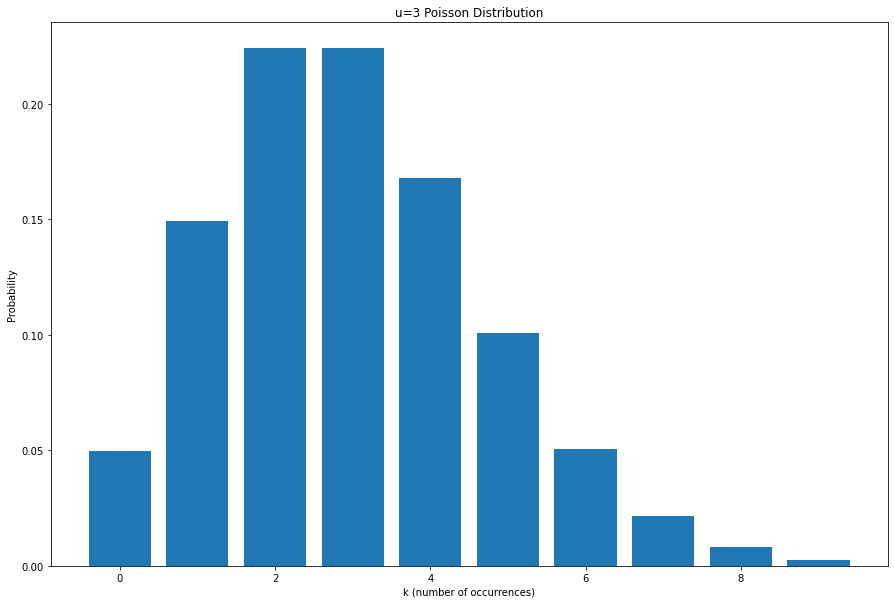

In [60]:
k = range(10)
u = 3
p = stats.poisson.pmf(k,u)

fig, ax = plt.subplots(1, 1)
ax.set_title("u=" + str(u) + " Poisson Distribution")
ax.bar(k,p)
ax.set_xlabel('k (number of occurrences)')
ax.set_ylabel('Probability')
plt.show()

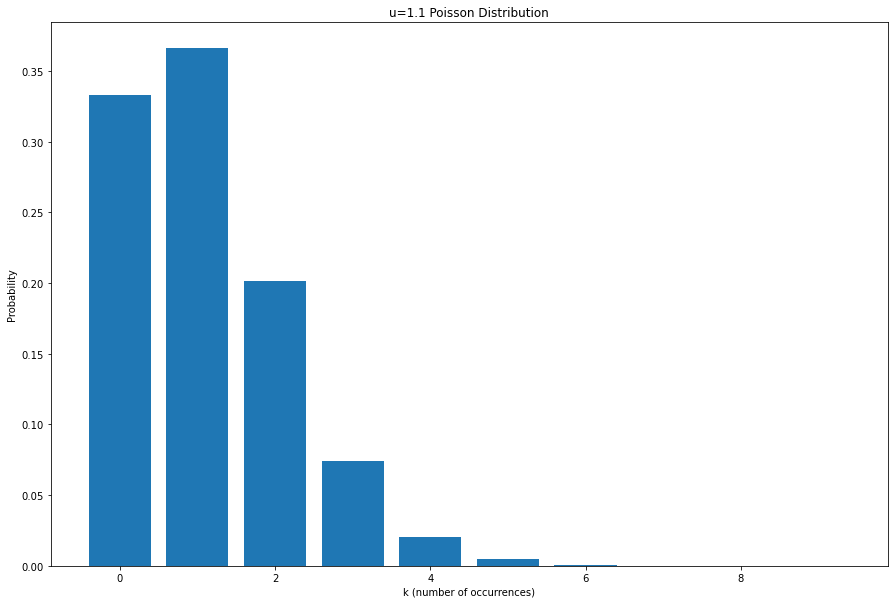

In [61]:
k = range(10)
u = 1.1
p = stats.poisson.pmf(k,u)

fig, ax = plt.subplots(1, 1)
ax.set_title("u=" + str(u) + " Poisson Distribution")
ax.bar(k,p)
ax.set_xlabel('k (number of occurrences)')
ax.set_ylabel('Probability')
plt.show()

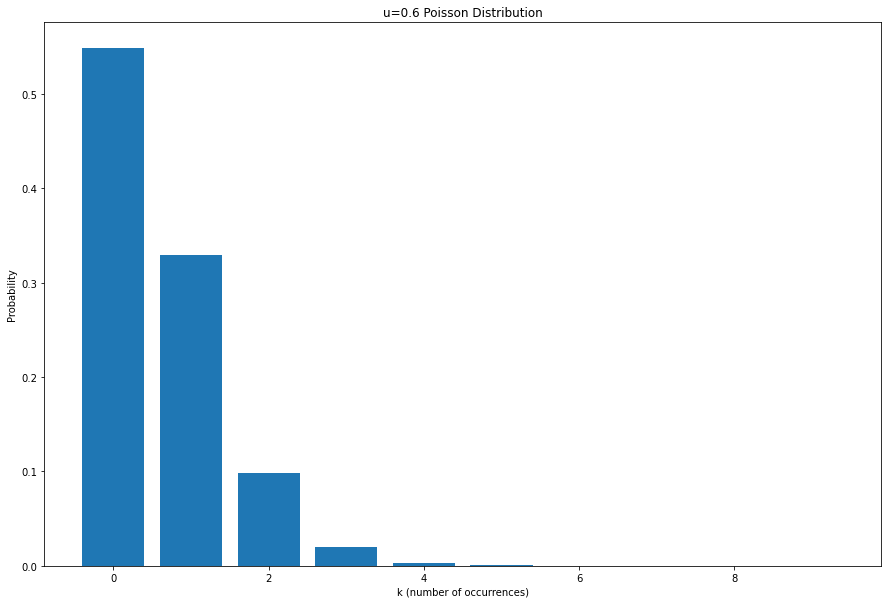

In [62]:
k = range(10)
u = 0.6
p = stats.poisson.pmf(k,u)

fig, ax = plt.subplots(1, 1)
ax.set_title("u=" + str(u) + " Poisson Distribution")
ax.bar(k,p)
ax.set_xlabel('k (number of occurrences)')
ax.set_ylabel('Probability')
plt.show()

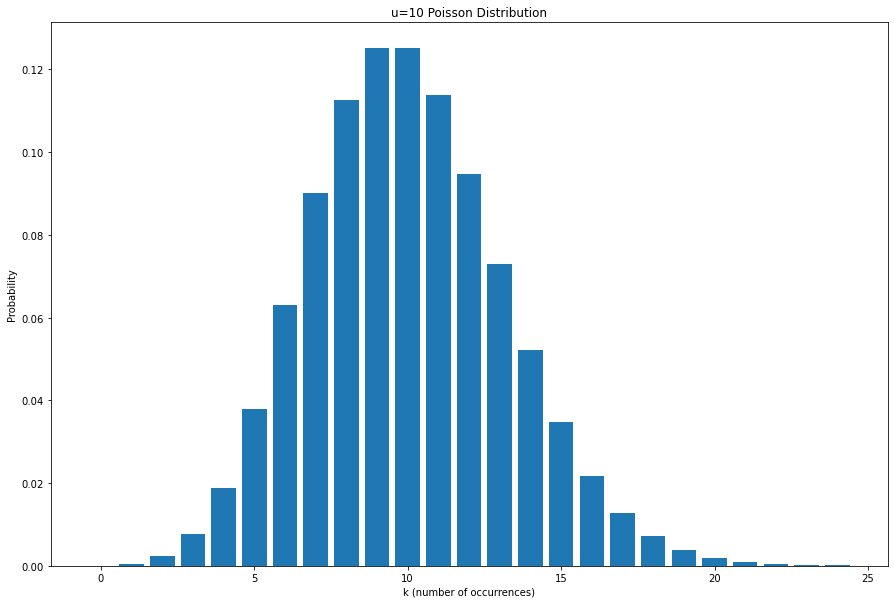

In [63]:
k = range(25)
u = 10
p = stats.poisson.pmf(k,u)

fig, ax = plt.subplots(1, 1)
ax.set_title("u=" + str(u) + " Poisson Distribution")
ax.bar(k,p)
ax.set_xlabel('k (number of occurrences)')
ax.set_ylabel('Probability')
plt.show()

Next we will state the hypothesis that we see fewer events than the expected value of 10, and we measure 3 events. What is the probability and sigma for a result of 3 or fewer events?

In [65]:
p = stats.poisson.cdf(3,10)
print(p)
sigma = stats.norm.ppf(p)
print(sigma)

0.010336050675925726
-2.3139201726832153


So the probability is about 1.03% and the sigma is 2.31

Since the Poisson distribution is discrete, the possible probabilities and sigmas are also discrete. This means that if a later experiment wants to improve the sigma of a previous experiment, they have a minimum amount they need to improve by to have an effect.

While the results are discrete, the mean and variance are not discrete. This is because you can always add more events to improve the "resolution" of the possible mean values.